In [2]:
# Import necessary libraries such as torch, numpy, pandas, matplotlib...etc
import torch

In [3]:
import torchvision

In [4]:
import torch.nn as nn

In [5]:
import torch.nn.functional as F

In [6]:
from torch.autograd import Variable

In [7]:
import numpy as np

In [8]:
import pandas as pd

In [9]:
import matplotlib.pyplot as plt

In [10]:
import re

In [11]:
import os

In [12]:
import nltk

In [13]:
from nltk.tokenize import word_tokenize

In [14]:
from nltk import PorterStemmer

In [15]:
from nltk import WordNetLemmatizer

In [16]:
from nltk.corpus import stopwords

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
from sklearn.model_selection import train_test_split

In [20]:
# Read the data from the csv file
data = pd.read_csv('spam_or_not_spam.csv')

In [21]:
# Remove empty entries
data.dropna(inplace=True)
# Switch labels to make spam have 0 label and not spam have 1 label using lambda function
change_labels = lambda x: 1 if x==0  else 0
data['label'] = data['label'].apply(change_labels)
# Display the first 5 elements from the data
data.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,1
1,martin a posted tassos papadopoulos the greek ...,1
2,man threatens explosion in moscow thursday aug...,1
3,klez the virus that won t die already the most...,1
4,in adding cream to spaghetti carbonara which ...,1


In [22]:
# The following section is for some NLP necassary preparations for the classifier
# Lambda function to remove non alphabets from the data
remove_non_alphabets = lambda x: re.sub(r'[^a-zA-Z]',' ',x)
# Tokenize the emails
tokenize = lambda x: word_tokenize(x)
# porter Stemmer the words
ps = PorterStemmer()
stem = lambda w: [ ps.stem(x) for x in w ]
lemmatizer = WordNetLemmatizer()
leammtizer = lambda x: [ lemmatizer.lemmatize(word) for word in x ]

In [23]:
#The following section applies the aforementioned preparations
print('Processing : [=', end='')
data['email'] = data['email'].apply(remove_non_alphabets)
print('=', end='')
data['email'] = data['email'].apply(tokenize) 
print('=', end='')
data['email'] = data['email'].apply(stem)
print('=', end='')
data['email'] = data['email'].apply(leammtizer)
print('=', end='')
data['email'] = data['email'].apply(lambda x: ' '.join(x))
print('] : Completed', end='')
data.head()

Processing : [=====] : Completed

,email,label
0,date wed number aug number number number numbe...,1
1,martin a post tasso papadopoulo the greek scul...,1
2,man threaten explos in moscow thursday august ...,1
3,klez the viru that won t die alreadi the most ...,1
4,in ad cream to spaghetti carbonara which ha th...,1


In [24]:
# Use scikitlearn CountVectorizer to create a matrix its rows represent the 
# number of emails and columns represent each word in all emails ordered 
# Aplphabitically, and each element represent the count of its appearnce in
# each email, then save this matrix in sparse_matrix
max_words = 20000
cv = CountVectorizer(max_features=max_words,stop_words='english')
sparse_matrix = cv.fit_transform(data['email']).toarray()

In [25]:
# Use Scikit Learn train_test_split to split your data into two set
# one for training the model, and the other for testing the classifier
# model created, also, the y data is transformed into a numpy array 
# to accomodate the splitting
x_train, x_test, y_train, y_test = train_test_split(sparse_matrix, np.array(data['label']))

In [26]:
# Create a neural network class based on pytorch nn.module 
# the neural netwrok created has two hidden layers, the first layer's input is
# equal to the number of columns/features in the input matrix x_train
# and it outputs a 100 outputs
# The second layer takes the 100 outputs from the first layer as input
# and outputs 10 outputs
# Then, the output layer takes 10 inputs and outputs two outputs one for each
# cluster

# The second forward method describes the activation function used, which is
# a Relu function for the first and second layer 

class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear1 = nn.Linear(20000, 100)
        self.linear2 = nn.Linear(100, 10)
        self.linear3 = nn.Linear(10, 2)
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x
        

In [27]:
model = LogisticRegression()

In [28]:
# Selecting the objective function as a cross entropy loss function
# and selecting the optimizer which is going to be Adam
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)

In [29]:
x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).long()

In [30]:
epochs = 20
model.train()
loss_values = []
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    loss_values.append(loss.item())
    pred = torch.max(y_pred, 1)[1].eq(y_train).sum()
    acc = pred * 100.0 / len(x_train)
    print('Epoch: {}, Loss: {}, Accuracy: {}%'.format(epoch+1, loss.item(), acc.numpy()))
    loss.backward()
    optimizer.step()

Epoch: 1, Loss: 0.6900357604026794, Accuracy: 77.01200866699219%
Epoch: 2, Loss: 0.5149199962615967, Accuracy: 83.81502532958984%
Epoch: 3, Loss: 0.35056984424591064, Accuracy: 84.88217163085938%
Epoch: 4, Loss: 0.2252124398946762, Accuracy: 92.30769348144531%
Epoch: 5, Loss: 0.14488919079303741, Accuracy: 97.06536102294922%
Epoch: 6, Loss: 0.08966434001922607, Accuracy: 98.48822021484375%
Epoch: 7, Loss: 0.05285528674721718, Accuracy: 99.19964599609375%
Epoch: 8, Loss: 0.032431576400995255, Accuracy: 99.4664306640625%
Epoch: 9, Loss: 0.021221712231636047, Accuracy: 99.55535888671875%
Epoch: 10, Loss: 0.01478296797722578, Accuracy: 99.68875122070312%
Epoch: 11, Loss: 0.010882101021707058, Accuracy: 99.73321533203125%
Epoch: 12, Loss: 0.008324445225298405, Accuracy: 99.73321533203125%
Epoch: 13, Loss: 0.006512979976832867, Accuracy: 99.73321533203125%
Epoch: 14, Loss: 0.005176570266485214, Accuracy: 99.77767944335938%
Epoch: 15, Loss: 0.004177265800535679, Accuracy: 99.8221435546875%
Ep

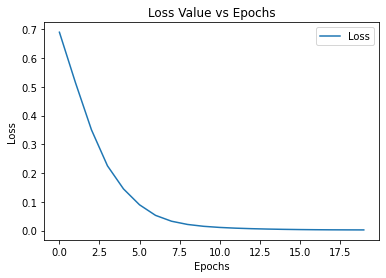

In [31]:
plt.plot(loss_values)
plt.title('Loss Value vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss'])
plt.show()

In [32]:
# Trnsform the numpy arrays x_test and y_test to torch.tensor to be able to use
# them in the model for training
x_test = torch.from_numpy(x_test).float()
y_test = torch.from_numpy(y_test).long()

In [33]:
model.eval()
with torch.no_grad():
    y_pred = model(x_test)
    loss = criterion(y_pred, y_test)
    pred = torch.max(y_pred, 1)[1].eq(y_test).sum()
    print ("Accuracy : {}%".format(100*pred/len(x_test)))

Accuracy : 98.80000305175781%
